In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PerfParser import PerfParser
from Preprocessor import Preprocessor

In [3]:
perf_dir = "perf-report/"
stdout_dir = "stdout/valid/"
category_to_file_path = "tags/category_to_file.json"
tags_path = "tags/tags.json"

In [ ]:
preprocessor = Preprocessor(stdout_dir="stdout/")
preprocessor.filter_stdout()

In [ ]:
perf_parser = PerfParser(
    perf_dir=perf_dir,
    stdout_dir=stdout_dir,
    category_to_file_path=category_to_file_path,
    tags_path=tags_path,
    normalize=False
)

Initializing CNF Stats...:   0%|          | 0/231 [00:00<?, ?it/s]

Initializing CNF Stats...: 100%|██████████| 231/231 [00:03<00:00, 66.25it/s]


In [23]:
json_out = "stats/cnf_stats.json"
perf_parser.save_stats_to_json(json_out)

In [24]:
agg_json_out = "stats/unnorm_agg_cnf_stats.json"
perf_parser.save_agg_stats_to_json(agg_json_out)

In [25]:
cat_json_out = "stats/unnorm_category_stats.json"
perf_parser.save_category_stats_to_json(cat_json_out)

In [35]:
from PerfTableGenerator import PerfTableGenerator

table_generator = PerfTableGenerator(
    agg_stats_path=agg_json_out,
    category_stats_path=cat_json_out
)

In [ ]:
function_table = table_generator.generate_function_table_latex()
print(function_table)
print(function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
update\_relevance\_bit & cache & 40244.25 & 14.18 \\
subsumed\_dtree & dtree & 32566.15 & 11.47 \\
set\_literal & sat & 26894.87 & 9.48 \\
pack\_var\_2bits & cache & 21798.70 & 7.68 \\
eliminated & compile & 19520.60 & 6.88 \\
same\_and\_nodes & nnf & 16761.50 & 5.91 \\
remove\_watched\_clause & sat & 16559.29 & 5.83 \\
update\_subsumption & sat & 12948.59 & 4.56 \\
erase\_level & sat & 11694.84 & 4.12 \\
update\_separator\_score & compile & 9786.53 & 3.45 \\
apply\_to\_vars & cache & 6875.92 & 2.42 \\
same\_or\_nodes & nnf & 5486.09 & 1.93 \\
lookup\_cnf\_cache & cache & 4534.43 & 1.60 \\
push\_items\_to\_end & compile & 4148.34 & 1.46 \\
get\_and\_node & nnf & 3891.11 & 1.37 \\
nnf\_node\_cmp & nnf & 3833.07 & 1.35 \\
subs\_cls & compile & 3127.76 & 1.10 \\
compile\_decomposed & compile & 2745.26 & 0.97 \\
add\_watched\_clause & sat & 2629.34 & 0.93 \\
conjoin\_relevant\_lits & nnf & 1947.

In [48]:
category_table = table_generator.generate_category_table_latex()
print(category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
cache & 79635.60 & 29.74 \\
sat & 72807.51 & 27.19 \\
compile & 43064.35 & 16.08 \\
nnf & 38029.22 & 14.20 \\
dtree & 34233.30 & 12.78 \\
\bottomrule
\end{tabular}



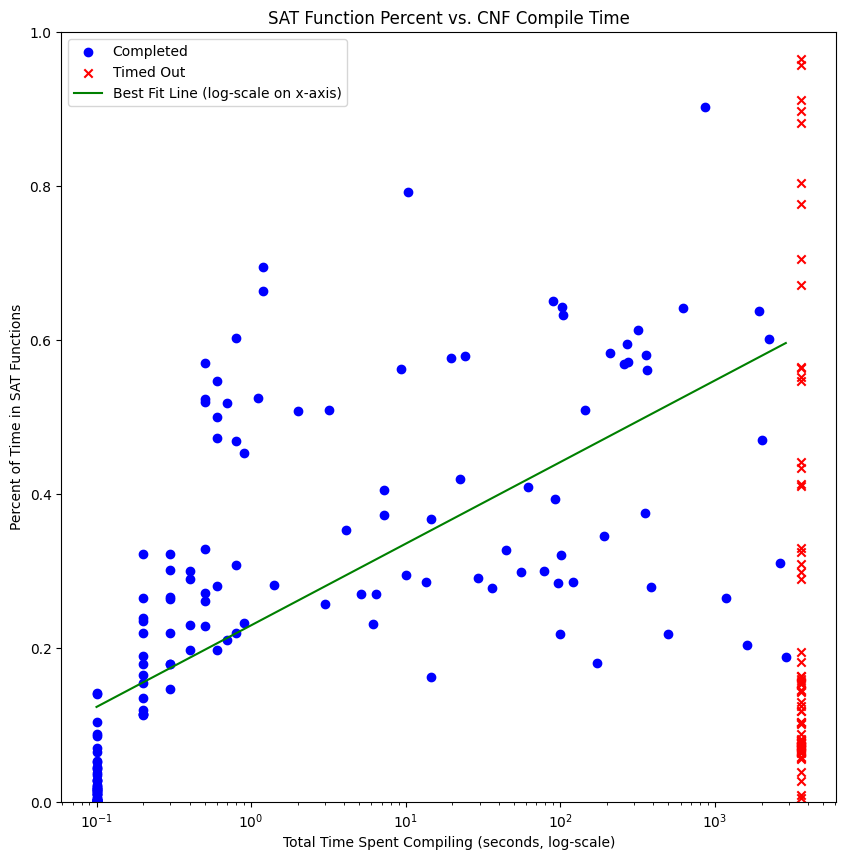

In [44]:
from SatPlotter import SatPlotter

sat_plotter = SatPlotter(cnf_stats_path=json_out)
sat_plotter.plot_sat_time_percent()